In [1]:
import os
import sys

# Add the src directory to sys.path to allow importing the package
# In Jupyter notebooks, we use the current working directory

notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, '../src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

In [ ]:
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from optuna.trial import Trial
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

from regularizeddiscriminantanalysis import RegularizedDiscriminantAnalysis

/Users/matteo/Desktop/RegularizedDiscriminantAnalysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load and preprocess data
X, y = load_breast_cancer(return_X_y=True)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [4]:
def objective(trial: Trial) -> float:
    """Objective function for Optuna optimization.
    
    Parameters
    ----------
    trial : optuna.trial.Trial
        Optuna trial object for hyperparameter suggestions.
    
    Returns
    -------
    float
        Mean cross-validation accuracy (to be maximized).
    """
    # Suggest hyperparameters
    lambda_ = trial.suggest_float('lambda_', 0.0, 1.0)
    gamma = trial.suggest_float('gamma', 0.0, 1.0)
    
    # Create RDA model
    rda = RegularizedDiscriminantAnalysis(
        lambda_=lambda_,
        gamma=gamma
    )
    
    # Cross-validate on training set
    scores = cross_val_score(
        rda, X_train, y_train, cv=5, scoring='f1'
    )
    
    return scores.mean()

In [ ]:
# Create study with TPE sampler (Bayesian optimization)
sampler = TPESampler(seed=42)
study = optuna.create_study(
    direction='maximize',
    sampler=sampler
)

# Optimize hyperparameters
print("Starting Optuna optimization for RDA...")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Get best parameters
best_params = study.best_params
best_value = study.best_value

print(f"\n{'='*60}")
print(f"Best Trial: #{study.best_trial.number}")
print(f"Best CV F1 Score: {best_value:.4f}")
print("Best Parameters:")
print(f"  lambda_: {best_params['lambda_']:.4f}")
print(f"  gamma:   {best_params['gamma']:.4f}")
print(f"{'='*60}")

[I 2025-12-03 15:44:34,255] A new study created in memory with name: no-name-a47ab3b2-6c90-4d31-9cc6-5cd92e130d46


Starting Optuna optimization for RDA...


Best trial: 18. Best value: 0.968038:  27%|██▋       | 27/100 [00:00<00:00, 145.64it/s]

[I 2025-12-03 15:44:34,269] Trial 0 finished with value: 0.9405499034490974 and parameters: {'lambda_': 0.3745401188473625, 'gamma': 0.9507143064099162}. Best is trial 0 with value: 0.9405499034490974.
[I 2025-12-03 15:44:34,277] Trial 1 finished with value: 0.9586308453199655 and parameters: {'lambda_': 0.7319939418114051, 'gamma': 0.5986584841970366}. Best is trial 1 with value: 0.9586308453199655.
[I 2025-12-03 15:44:34,284] Trial 2 finished with value: 0.9418120351588911 and parameters: {'lambda_': 0.15601864044243652, 'gamma': 0.15599452033620265}. Best is trial 1 with value: 0.9586308453199655.
[I 2025-12-03 15:44:34,291] Trial 3 finished with value: 0.9417086396316889 and parameters: {'lambda_': 0.05808361216819946, 'gamma': 0.8661761457749352}. Best is trial 1 with value: 0.9586308453199655.
[I 2025-12-03 15:44:34,297] Trial 4 finished with value: 0.9587561586031734 and parameters: {'lambda_': 0.6011150117432088, 'gamma': 0.7080725777960455}. Best is trial 4 with value: 0.95875

Best trial: 18. Best value: 0.968038:  30%|███       | 30/100 [00:00<00:00, 144.89it/s]

[I 2025-12-03 15:44:34,460] Trial 28 finished with value: 0.9659405065442801 and parameters: {'lambda_': 0.9938308060476384, 'gamma': 0.21113298038398604}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,467] Trial 29 finished with value: 0.9641418819630776 and parameters: {'lambda_': 0.9961002695170315, 'gamma': 0.32719859065967455}. Best is trial 18 with value: 0.9680378848214337.


Best trial: 18. Best value: 0.968038:  56%|█████▌    | 56/100 [00:00<00:00, 142.75it/s]

[I 2025-12-03 15:44:34,475] Trial 30 finished with value: 0.9623079902332238 and parameters: {'lambda_': 0.9313561331022734, 'gamma': 0.5311240303514603}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,482] Trial 31 finished with value: 0.9680378848214337 and parameters: {'lambda_': 0.9277530213886823, 'gamma': 0.19290690763646673}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,489] Trial 32 finished with value: 0.9680378848214337 and parameters: {'lambda_': 0.9368619896648693, 'gamma': 0.19035422620770448}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,496] Trial 33 finished with value: 0.9622770860387544 and parameters: {'lambda_': 0.718467976910326, 'gamma': 0.15497320863603303}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,503] Trial 34 finished with value: 0.9623079902332238 and parameters: {'lambda_': 0.9317974296307155, 'gamma': 0.4078226521899437}. Best is trial 18 with value

Best trial: 18. Best value: 0.968038:  58%|█████▊    | 58/100 [00:00<00:00, 142.75it/s]

[I 2025-12-03 15:44:34,666] Trial 57 finished with value: 0.9643283680900364 and parameters: {'lambda_': 0.743412514567491, 'gamma': 0.14084733985772593}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,673] Trial 58 finished with value: 0.9660041408360044 and parameters: {'lambda_': 0.888809364275138, 'gamma': 0.0018031707817141446}. Best is trial 18 with value: 0.9680378848214337.


Best trial: 62. Best value: 0.969642:  80%|████████  | 80/100 [00:00<00:00, 142.58it/s]

[I 2025-12-03 15:44:34,680] Trial 59 finished with value: 0.9660361774364112 and parameters: {'lambda_': 0.8132415970588371, 'gamma': 0.10312105188623803}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,687] Trial 60 finished with value: 0.9581138207326318 and parameters: {'lambda_': 0.5839950905218905, 'gamma': 0.040677113559204406}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,694] Trial 61 finished with value: 0.9675809164488409 and parameters: {'lambda_': 0.9711731520804705, 'gamma': 0.04201130545919867}. Best is trial 18 with value: 0.9680378848214337.
[I 2025-12-03 15:44:34,701] Trial 62 finished with value: 0.9696415225094471 and parameters: {'lambda_': 0.9508075098561362, 'gamma': 0.056244346906978646}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,708] Trial 63 finished with value: 0.9659405065442801 and parameters: {'lambda_': 0.9156673942714, 'gamma': 0.18779221642120197}. Best is trial 62 with val

Best trial: 62. Best value: 0.969642:  82%|████████▏ | 82/100 [00:00<00:00, 142.58it/s]

[I 2025-12-03 15:44:34,868] Trial 81 finished with value: 0.9679040707719953 and parameters: {'lambda_': 0.9261372408718175, 'gamma': 0.055874046788384285}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,876] Trial 82 finished with value: 0.9602473841726178 and parameters: {'lambda_': 0.9792605254825869, 'gamma': 0.6795065122967671}. Best is trial 62 with value: 0.9696415225094471.


Best trial: 62. Best value: 0.969642: 100%|██████████| 100/100 [00:00<00:00, 135.95it/s]

[I 2025-12-03 15:44:34,883] Trial 83 finished with value: 0.9659405065442801 and parameters: {'lambda_': 0.9545551175538949, 'gamma': 0.11663356357577104}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,890] Trial 84 finished with value: 0.9659405065442801 and parameters: {'lambda_': 0.9938068645780518, 'gamma': 0.19352476238108154}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,898] Trial 85 finished with value: 0.9642030548068284 and parameters: {'lambda_': 0.909044947880665, 'gamma': 0.08247871692776128}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,905] Trial 86 finished with value: 0.9574284676858443 and parameters: {'lambda_': 0.4897512550751938, 'gamma': 0.02369928399171662}. Best is trial 62 with value: 0.9696415225094471.
[I 2025-12-03 15:44:34,912] Trial 87 finished with value: 0.9680378848214337 and parameters: {'lambda_': 0.9376702608354682, 'gamma': 0.16041658085464028}. Best is trial 62 with val

/Users/matteo/Desktop/RegularizedDiscriminantAnalysis/.venv/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(



Training LDA and QDA for comparison...

MODEL COMPARISON - Test Set Performance
RDA (λ=0.951, γ=0.056): 0.9683
LDA (λ=1.0, γ=0.0):                        0.9636
QDA (λ=0.0, γ=0.0):                        0.9722

RDA Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


LDA Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171


QDA Classification Report:
              precision    recall  f1-score   supp

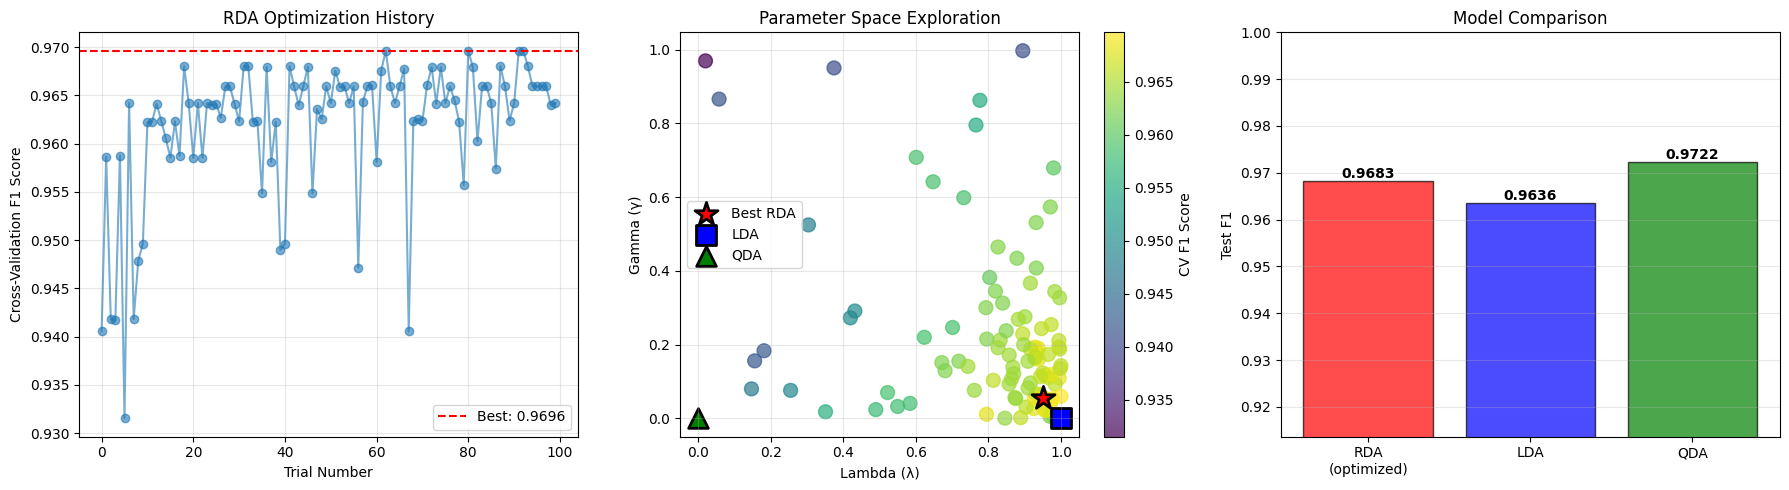

In [ ]:
# Train final model with best parameters
rda_best = RegularizedDiscriminantAnalysis(
    lambda_=best_params['lambda_'],
    gamma=best_params['gamma']
)
rda_best.fit(X_train, y_train)

# Train LDA and QDA for comparison
print("\nTraining LDA and QDA for comparison...")
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Evaluate all models on test set
y_pred_rda = rda_best.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)

test_f1_rda = f1_score(y_test, y_pred_rda)
test_f1_lda = f1_score(y_test, y_pred_lda)
test_f1_qda = f1_score(y_test, y_pred_qda)

print(f"\n{'='*60}")
print("MODEL COMPARISON - Test Set Performance")
print(f"{'='*60}")
print(f"RDA (λ={best_params['lambda_']:.3f}, γ={best_params['gamma']:.3f}): {test_f1_rda:.4f}")
print(f"LDA (λ=1.0, γ=0.0):                        {test_f1_lda:.4f}")
print(f"QDA (λ=0.0, γ=0.0):                        {test_f1_qda:.4f}")
print(f"{'='*60}")

print("\nRDA Classification Report:")
print(classification_report(y_test, y_pred_rda))

print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda))

print("\nQDA Classification Report:")
print(classification_report(y_test, y_pred_qda))

# Visualize optimization history and comparison
fig = plt.figure(figsize=(18, 5))

# Subplot 1: Optimization history
ax1 = plt.subplot(1, 3, 1)
trials_df = study.trials_dataframe()
ax1.plot(trials_df['number'], trials_df['value'], 'o-', alpha=0.6)
ax1.axhline(y=best_value, color='r', linestyle='--', label=f'Best: {best_value:.4f}')
ax1.set_xlabel('Trial Number')
ax1.set_ylabel('Cross-Validation F1 Score')
ax1.set_title('RDA Optimization History')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Parameter space exploration
ax2 = plt.subplot(1, 3, 2)
scatter = ax2.scatter(
    trials_df['params_lambda_'],
    trials_df['params_gamma'],
    c=trials_df['value'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
ax2.scatter(
    best_params['lambda_'],
    best_params['gamma'],
    c='red',
    s=300,
    marker='*',
    edgecolors='black',
    linewidth=2,
    label='Best RDA'
)
# Mark LDA and QDA positions
ax2.scatter(1.0, 0.0, c='blue', s=200, marker='s', edgecolors='black', linewidth=2, label='LDA')
ax2.scatter(0.0, 0.0, c='green', s=200, marker='^', edgecolors='black', linewidth=2, label='QDA')
ax2.set_xlabel('Lambda (λ)')
ax2.set_ylabel('Gamma (γ)')
ax2.set_title('Parameter Space Exploration')
ax2.legend()
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('CV F1 Score')
ax2.grid(True, alpha=0.3)

# Subplot 3: Model comparison
ax3 = plt.subplot(1, 3, 3)
models = ['RDA\n(optimized)', 'LDA', 'QDA']
accuracies = [test_f1_rda, test_f1_lda, test_f1_qda]
colors = ['red', 'blue', 'green']
bars = ax3.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Test F1')
ax3.set_title('Model Comparison')
ax3.set_ylim([min(accuracies) - 0.05, 1.0])
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, acc in zip(bars, accuracies, strict=False):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('rda_comparison.png', dpi=300, bbox_inches='tight')
print("\nComparison plot saved to 'rda_comparison.png'")
plt.show()
